In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [18]:
data1 = data.drop('country', axis=1)
data_num1 =data1.select_dtypes(include=['number'])
data_num = data_num1.fillna(data_num1.mean())
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_proc = (data_num - mean) / std
countries = data.iloc[:,0]
countries.head()
print(data_proc.dtypes)

child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object


In [19]:

class KmeansClustering:
    def __init__(self, k, n_iters=50):
        self.k = k
        self.n_iters = n_iters
        self.centroids = None
        self.centroids_progression = []
        self.labels_progression = []
    def fit(self, X):
        X = np.array(X)
        n_samples, n_features = X.shape

        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, n_features))

        for _ in range(self.n_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            y = np.argmin(distances, axis=1)
            self.labels_progression.append(y)
            new_centroids = []
            for i in range(self.k):
                cluster_points = X[y == i]
                if len(cluster_points) == 0:
                    new_centroids.append(X[np.random.choice(n_samples)])  
                else:
                    new_centroids.append(cluster_points.mean(axis=0))
            self.centroids = np.array(new_centroids)
            self.centroids_progression.append(self.centroids.copy())
        return y

    def inertia(self, X, y):
        X = np.array(X)
        inertia = 0
        for i in range(self.k):
            cluster_points = X[y == i]
            centroid = self.centroids[i]
            inertia += np.sum((cluster_points - centroid) ** 2)
        return inertia


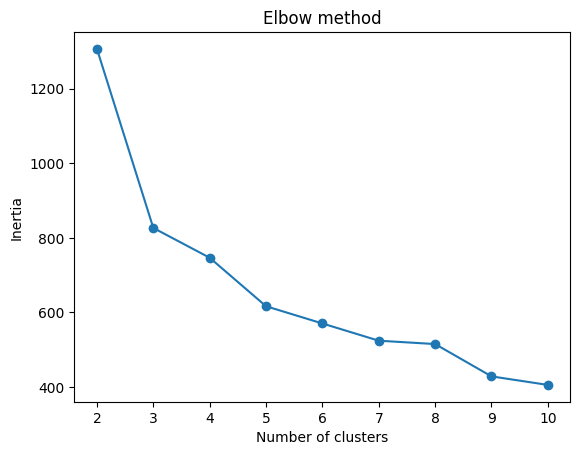

167


In [20]:
inertias = []
for i in range(2,11):
    clusterer = KmeansClustering(k=i)
    labels = clusterer.fit(data_proc)
    inertias.append(clusterer.inertia(data_proc,labels))
plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print(data_proc.shape[0])

In [21]:
def pca(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered.T)
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    X_pca = X_centered.dot(eigvecs[:, :n_components])
    return X_pca
X_pca = pca(data_proc, n_components=3)
clusterer = KmeansClustering(k=4)
labels = clusterer.fit(data_proc)
X_pca = np.array(X_pca)  


In [22]:
"""matplotlib
plt.ion()
folder_path = "C:\ImportantOutputs\KmeansClusterAnim"
def plot_centroids_and_data(iteration, X_pca, clusterer, ax, centroid_scatter, data_scatter):
    if data_scatter is not None:
        data_scatter.remove() 
    if centroid_scatter is not None:
        centroid_scatter.remove() 
    labels_step = clusterer.labels_progression[iteration]
    data_scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_step, cmap='viridis', marker='o')
    centroids_step = clusterer.centroids_progression[iteration]
    centroid_scatter = ax.scatter(centroids_step[:, 0], centroids_step[:, 1], centroids_step[:, 2], color='red', marker='x', s=100)
    ax.set_title(f'K-Means Clustering with PCA (Iteration {iteration + 1})')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.savefig(f"{folder_path}/frame_{i}.png")
    plt.draw()
    plt.pause(0.2)

    return centroid_scatter, data_scatter
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
centroid_scatter = None
data_scatter = None
for i in range(0, len(clusterer.centroids_progression), 1):
    centroid_scatter, data_scatter = plot_centroids_and_data(i, X_pca, clusterer, ax, centroid_scatter, data_scatter)
plt.show()
"""

'matplotlib\nplt.ion()\nfolder_path = "C:\\ImportantOutputs\\KmeansClusterAnim"\ndef plot_centroids_and_data(iteration, X_pca, clusterer, ax, centroid_scatter, data_scatter):\n    if data_scatter is not None:\n        data_scatter.remove() \n    if centroid_scatter is not None:\n        centroid_scatter.remove() \n    labels_step = clusterer.labels_progression[iteration]\n    data_scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_step, cmap=\'viridis\', marker=\'o\')\n    centroids_step = clusterer.centroids_progression[iteration]\n    centroid_scatter = ax.scatter(centroids_step[:, 0], centroids_step[:, 1], centroids_step[:, 2], color=\'red\', marker=\'x\', s=100)\n    ax.set_title(f\'K-Means Clustering with PCA (Iteration {iteration + 1})\')\n    ax.set_xlabel(\'Principal Component 1\')\n    ax.set_ylabel(\'Principal Component 2\')\n    ax.set_zlabel(\'Principal Component 3\')\n    plt.savefig(f"{folder_path}/frame_{i}.png")\n    plt.draw()\n    plt.pause(0.2)\n\n 

<video width="560" height="315" controls>
  <source src="content/KmeansOutputViz.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

In [23]:
for i in range(4): 
    cluster_countries = [countries[j] for j in range(len(countries)) if labels[j] == i]
    print(f"Cluster {i+1}: {', '.join(cluster_countries)}")

Cluster 1: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Brunei, Bulgaria, Cambodia, Canada, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Cyprus, Czech Republic, Denmark, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Finland, France, Georgia, Germany, Greece, Grenada, Guatemala, Guyana, Hungary, Iceland, Indonesia, Iran, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kuwait, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Montenegro, Morocco, Netherlands, New Zealand, Norway, Oman, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Slovak Republic, Slovenia, South Korea, Spain, Sri Lanka, St. Vincent and the Grenadines, Suriname, Sweden, Thailand, Tonga

In [24]:
def silhouette_score(X, labels):
    X = np.array(X)
    labels = np.array(labels)
    
    n_samples = X.shape[0]
    
    silhouette_scores = []
    
    for i in range(n_samples):
        point = X[i]
        point_label = labels[i]
        
        same_cluster_points = X[labels == point_label]
        a_i = np.mean(np.linalg.norm(same_cluster_points - point, axis=1))
        
        other_labels = np.unique(labels[labels != point_label])
        b_i = np.inf 
        
        for other_label in other_labels:
            other_cluster_points = X[labels == other_label]
            b_i_cluster = np.mean(np.linalg.norm(other_cluster_points - point, axis=1))
            b_i = min(b_i, b_i_cluster)
        
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(s_i)
    
    return np.mean(silhouette_scores)

In [25]:
class KNearestNeighbourClustering:
    def __init__(self,k=3):
        self.k = k
    def fit(self,X,y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    def distsortvote(self,x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_class = unique_labels[np.argmax(counts)]
        return predicted_class
    def predict(self,X_test):
        predictions = [self.distsortvote(x) for x in np.array(X_test)]
        return np.array(predictions)

In [26]:
df_classification = data_proc.copy()  # Copy the existing data_proc dataframe
def classify_development(row):
    # Stricter thresholds for developed countries based on Australia's values
    if row['life_expec'] > 1.0 and row['gdpp'] > 1.0 and row['child_mort'] < -0.5:
        return 2  # Developed
    # Moderate range for developing countries
    elif -1.0 <= row['life_expec'] <= 1.0 and -1.0 <= row['gdpp'] <= 1.0 and -0.5 <= row['child_mort'] <= 0.5:
        return 1  # Developing
    else:
        return 0  # Underdeveloped

# Apply the function to classify each row
df_classification['development_status'] = df_classification.apply(classify_development, axis=1)

# Check the distribution of the categories
print(df_classification['development_status'].value_counts())

development_status
0    104
1     42
2     21
Name: count, dtype: int64


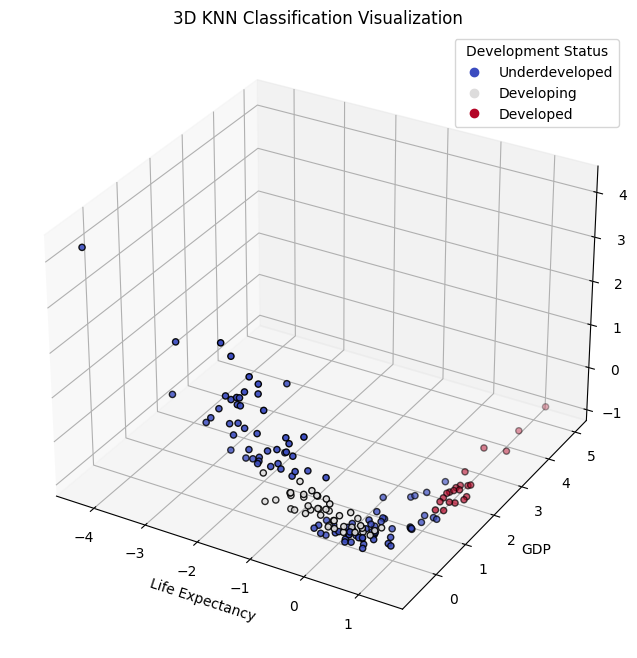

In [34]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points with different colors
scatter = ax.scatter(df_classification['life_expec'], df_classification['gdpp'], df_classification['child_mort'],
                     c=df_classification['development_status'], cmap='coolwarm', edgecolors='k')

ax.set_xlabel('Life Expectancy')
ax.set_ylabel('GDP')
ax.set_zlabel('Child Mortality')
plt.title("3D KNN Classification Visualization")
ax.legend(handles=scatter.legend_elements()[0], labels=['Underdeveloped', 'Developing', 'Developed'], title="Development Status")
plt.show()

In [28]:
test_size = 0.3

n_samples = df_classification.shape[0]
n_test_samples = int(n_samples * test_size)
indices = np.arange(n_samples)
np.random.shuffle(indices)
train_indices = indices[n_test_samples:]
test_indices = indices[:n_test_samples]
y = df_classification['development_status']
X = df_classification.drop(['development_status'], axis=1)
X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

In [29]:
knnclust = KNearestNeighbourClustering()
knnclust.fit(X_train,y_train)
predict = knnclust.predict(X_test)
acc = np.sum(predict==y_test)/len(y_test)
print(acc)

0.8


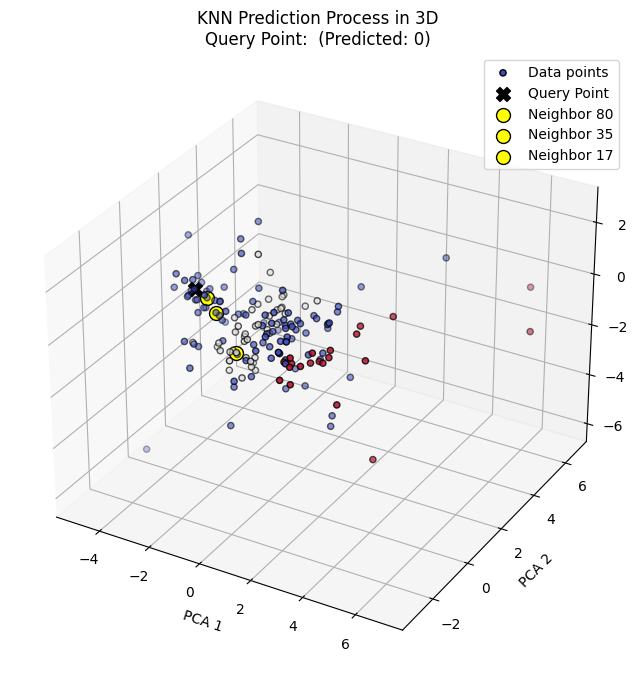

In [30]:
query_point_9D = df_classification.iloc[0, :-1].values  # The original 9D data (not PCA-reduced)

# Get the indices of the nearest neighbors using your custom KNN model
predicted_label = knnclust.predict([query_point_9D])  # Predict using the original 9D data

# Get the indices of the nearest neighbors (manual calculation based on distances)
distances = np.linalg.norm(knnclust.X_train - query_point_9D, axis=1)  # Use 9D data here
k_indices = np.argsort(distances)[:knnclust.k]

# Plot all data points in 3D (using X_pca for dimensionality reduction)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points in 3D (use X_pca for dimensionality reduction)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_classification['development_status'], cmap='coolwarm', edgecolors='k', label='Data points')

# Plot the query point in black
query_point_pca = X_pca[0]  # Use the PCA-reduced version of the query point
ax.scatter(query_point_pca[0], query_point_pca[1], query_point_pca[2], c='black', marker='X', s=100, label='Query Point')

# Highlight the nearest neighbors in yellow
for i in k_indices:
    ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='yellow', marker='o', s=100, edgecolors='k', label=f"Neighbor {i}")

# Set titles and labels
ax.set_title(f"KNN Prediction Process in 3D\nQuery Point:  (Predicted: {predicted_label[0]})")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Show legend
ax.legend()
